# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import datetime

import warnings
warnings.filterwarnings('ignore')

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv(r'marketing.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
(df.isnull().sum() / len(df)) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

<ul>
    <li>Column 'Income' has around 1.1% missing values.</li>
</ul>

In [6]:
# Filling null values of column 'Income' with the median values
df['Income'] = df['Income'].fillna(df['Income'].median())
    
# Re-checking missing values
(df.isnull().sum() / len(df)) * 100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
# checking for duplicates
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


<ul>
    <li>No duplicate records present in dataset.</li>
</ul>

### 5. Drop the columns which you think redundant for the analysis 

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [9]:
df.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
single = ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

# Grouping categories 'Married', 'Together' as 'Relationship'
df.loc[~df['Marital_Status'].isin(single), 'Marital_Status'] = 'Relationship'

# Grouping categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df.loc[df['Marital_Status'].isin(single), 'Marital_Status'] = 'Single'

df['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [12]:
col_series = pd.Series(df.columns)
cols = col_series[col_series.str.contains('Mnt')].values.tolist()
df['Total_Expenses'] = df[cols].sum(axis=1)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [13]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [14]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [15]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,422,19,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [16]:
# Dropping grouped columns
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
         'Kidhome', 'Teenhome',
         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
        axis=1, inplace=True)

In [17]:
df.sample(5)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
1000,1956,PhD,Single,78028.0,38,7,0,528,20,1,3
979,1954,Graduation,Relationship,53103.0,70,7,0,1085,28,1,1
2025,1979,Master,Relationship,32765.0,49,5,0,46,8,1,0
1785,1967,Graduation,Single,46904.0,20,8,0,253,14,2,0
1300,1971,Master,Relationship,157733.0,37,1,0,59,2,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [18]:
# Extracting 'Age' from Current Year and Birth Year
year_curr = datetime.date.today().year

df['Age'] = year_curr - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)
df.sample(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
2026,Graduation,Relationship,29672.0,6,6,0,25,4,2,0,58
1969,Master,Relationship,85738.0,41,1,0,1371,21,0,2,45
1802,Master,Relationship,59385.0,85,5,0,185,10,2,0,72
880,Graduation,Single,24762.0,16,8,0,86,9,1,2,51
173,PhD,Relationship,53537.0,17,5,0,93,8,2,0,64


### 13. Encode the categorical variables in the dataset

In [19]:
# Encoding the categorical variables
cat = ['Education', 'Marital_Status']
df1 = df.copy()

# Initializing Label Encoder
le = LabelEncoder()

for i in cat:
    df1[i]=df1[[i]].apply(le.fit_transform).astype(np.uint8)
    
df1.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,1,58138.0,58,7,0,1617,25,0,1,66
1,2,1,46344.0,38,5,0,27,6,2,0,69
2,2,0,71613.0,26,4,0,776,21,0,0,58
3,2,0,26646.0,26,6,0,53,8,1,0,39
4,4,0,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [20]:
# Standardizing the columns
ss = StandardScaler()
scaled_features = ss.fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,1.346874,0.235696,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.235454,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.773999,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.742460,-1.022355,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.742460,0.241888,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [21]:
# Calculating the covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.12003272, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.01375403,  1.00044663, -0.00468593,  0.00450972, -0.00344176,
         0.00520466,  0.01775232, -0.00671037, -0.03917598,  0.06004206,
         0.0042384 ],
       [ 0.12003272, -0.00468593,  1.00044663, -0.0040626 , -0.55003054,
        -0.02719904,  0.66507176,  0.56370172, -0.29098745,  0.28723724,
         0.16097107],
       [-0.01173369,  0.00450972, -0.0040626 ,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882, -0.00344176, -0.55003054, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252,  0.00520466, -0.02719904,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [22]:
# Calculating the eigen values and eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen values:','\n', eig_vals)
print('\n')
print('Eigen vectors:', '\n', eig_vectors)

Eigen values: 
 [3.1904976  0.15898427 0.33405275 1.2576053  0.57467313 0.70088133
 0.8148781  0.88268049 1.07559424 0.99819893 1.01686678]


Eigen vectors: 
 [[-8.10840602e-02 -1.28350259e-02  2.36686503e-02  5.51297088e-01
   9.44079917e-02  1.09399823e-01  6.91176145e-01 -2.13936354e-01
   3.53448105e-01  1.33251310e-01  4.14253698e-02]
 [-1.65906490e-02  5.37729948e-04 -2.73537172e-03 -7.24644501e-02
  -9.30748009e-03  1.59677373e-01 -9.75268782e-02  2.48019835e-01
   2.93280626e-01  5.20531449e-01 -7.35452612e-01]
 [-4.53903415e-01 -1.10154101e-01 -7.33770178e-01  1.11579420e-01
  -4.00829608e-01  2.33759772e-01 -3.55280357e-02  8.22772957e-02
  -7.11591328e-02 -3.28890469e-02  3.85228536e-02]
 [ 4.88801362e-03 -3.74741918e-02 -1.77808800e-02  1.12911590e-01
  -4.88512292e-02 -1.39140776e-01  2.76281232e-02 -4.78105566e-01
  -6.57509247e-01  5.43269886e-01 -8.33737576e-02]
 [ 3.78637324e-01  9.89967067e-02 -5.23086432e-01  3.88610332e-02
   4.48301055e-01  8.26478962e-02 -2.948866

In [23]:
# Explained Variance
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance:', var_exp)
print('\n')
print('Cumulative Explained Variance:', cum_var_exp)

Explained Variance: [28.991575143457837, 11.427671513170507, 9.77376419019717, 9.240116561433673, 9.070484567401635, 8.020785766248592, 7.404675574847669, 6.368803961509485, 5.221968893580304, 3.035487484221483, 1.4446663439316367]


Cumulative Explained Variance: [ 28.99157514  40.41924666  50.19301085  59.43312741  68.50361198
  76.52439774  83.92907332  90.29787728  95.51984617  98.55533366
 100.        ]


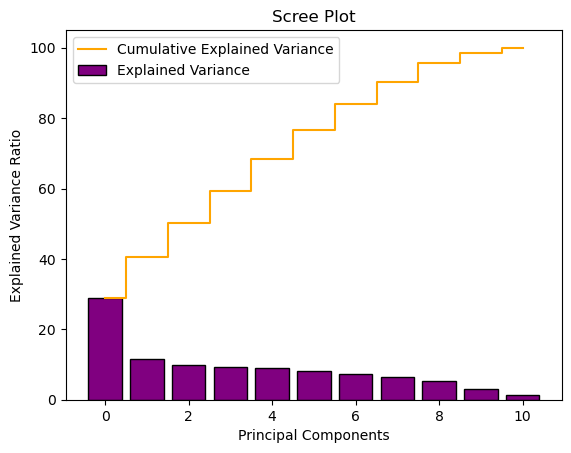

In [24]:
# Scree plot
plt.bar(range(0,len(var_exp)), var_exp, align='center', color='purple', edgecolor='black', label='Explained Variance')
plt.step(range(0,len(cum_var_exp)), cum_var_exp, where='mid', color='orange', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

<ul>
    <li>From the above Scree plot, we can observe that the first 8 principal components explain about 90-95% of the variation. So we can choose the optimal number of principal components as 8.</li>
</ul>

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [25]:
# Using the dimension obtained from PCA(=8) to apply clustering
pca = PCA(n_components=8)
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=cols)
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414


<h4>Applying K-means clustering on the PCA transformed data</h4>

In [26]:
# Finding optimal K-value by KMeans clustering using Elbow plot
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

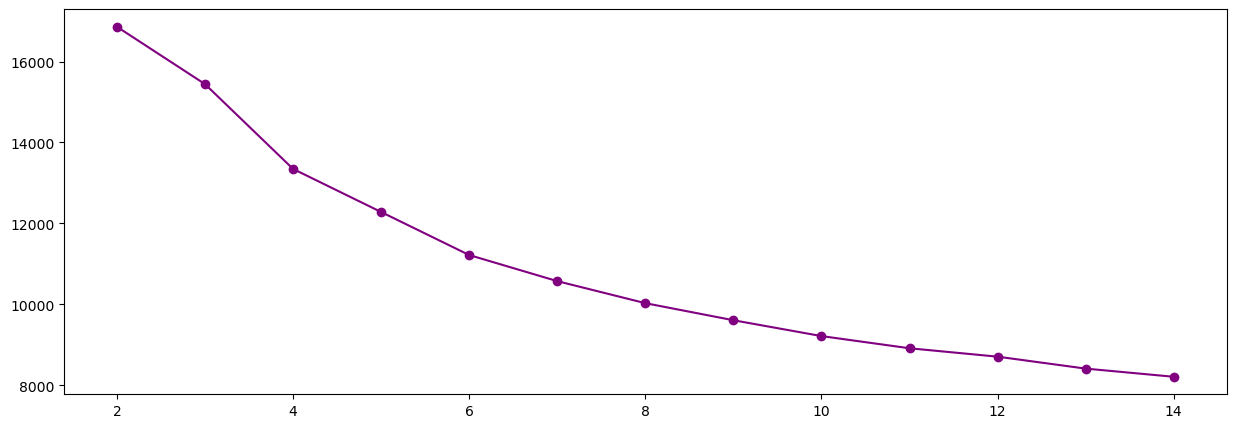

In [27]:
# Creating a dataframe of number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

# Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='purple')

<ul>
    <li>From the above Elbow plot, we can observe that the inertia decreases significantly at K=3. Hence, we can select K=3 as our optimal cluster.</li>
</ul>

In [28]:
# Applying KMeans clustering for the optimal number of clusters obtained above
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [29]:
# Creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [30]:
# Joining label dataframe with the pca_df dataframe
kmeans_df = pca_df.join(label)
kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545,0
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326,1
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777,0
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502,1
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414,2


In [31]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

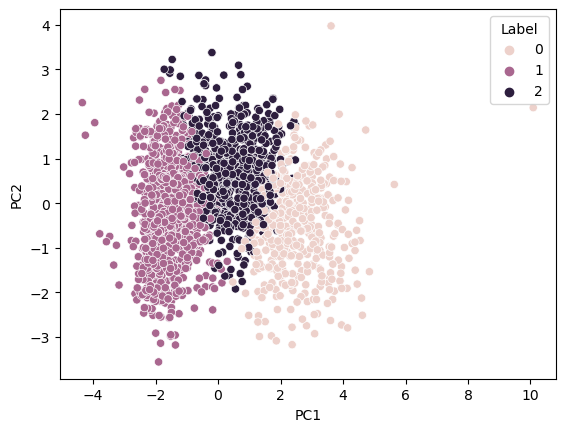

In [32]:
# Visualising the clusters formed
sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label', data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

<h4>Applying Agglomerative clustering using the original data</h4>

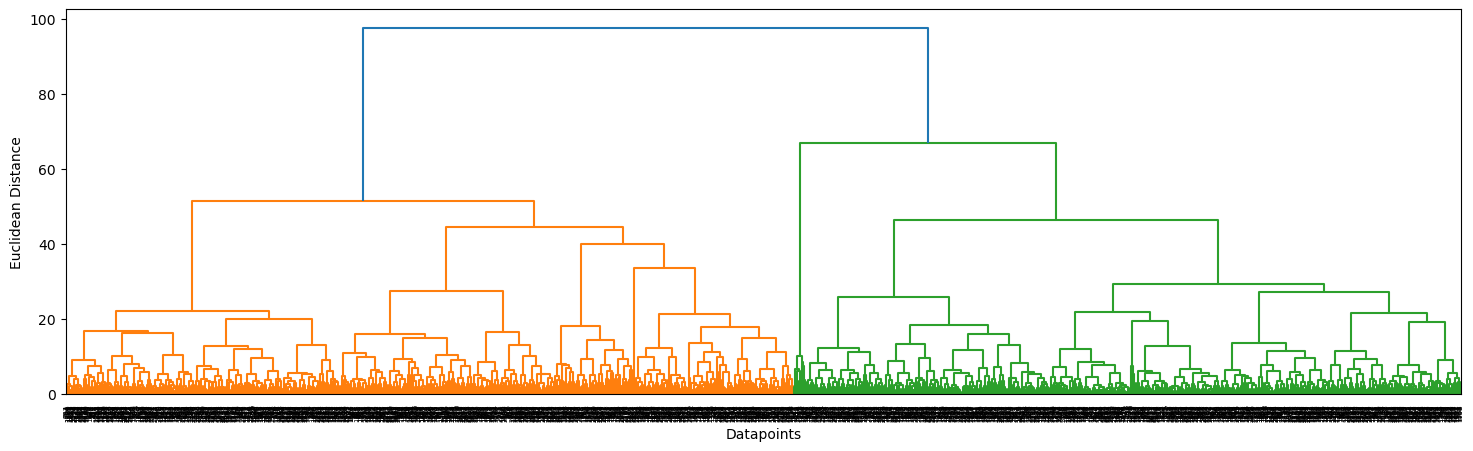

In [33]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

<h4>Computing Silhouette Score for Agglomerative clustering</h4>

In [34]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    silhouette_avg = silhouette_score(scaled_features_df, labels)
    print('For n_clusters =', i,"average silhouette_score is :", silhouette_avg)

For n_clusters = 2 average silhouette_score is : 0.19084804869286545
For n_clusters = 3 average silhouette_score is : 0.1985995824170426
For n_clusters = 4 average silhouette_score is : 0.11246117002822419
For n_clusters = 5 average silhouette_score is : 0.11424998800535785
For n_clusters = 6 average silhouette_score is : 0.13182229011122568
For n_clusters = 7 average silhouette_score is : 0.13957493415194128
For n_clusters = 8 average silhouette_score is : 0.139075650529795
For n_clusters = 9 average silhouette_score is : 0.1133755030484244
For n_clusters = 10 average silhouette_score is : 0.11192620306577665
For n_clusters = 11 average silhouette_score is : 0.10382539581016359
For n_clusters = 12 average silhouette_score is : 0.1089357352582103
For n_clusters = 13 average silhouette_score is : 0.10234785589805018
For n_clusters = 14 average silhouette_score is : 0.09550766042020287


<ul>
    <li>From the above Dendrogram as well as the Silhouette scores, we can observe that cluster 3 has the highest Silhouette score.</li>
    <li>Hence, we can choose K=3 as the optimal cluster size to build an Agglomerative clustering model using the original scaled dataset.</li>
</ul>

In [35]:
# Building hierarchical clustering model using K=3
hier_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hier_cluster_model = hier_cluster.fit(scaled_features_df)

In [36]:
# Creating dataframe of the labels
df_label1 = pd.DataFrame(hier_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [37]:
# Joining the label dataframe with the initial unscaled dataframe df
df_hier = df.join(df_label1)
df_hier.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,42,0


### Visualization and Interpretation of results

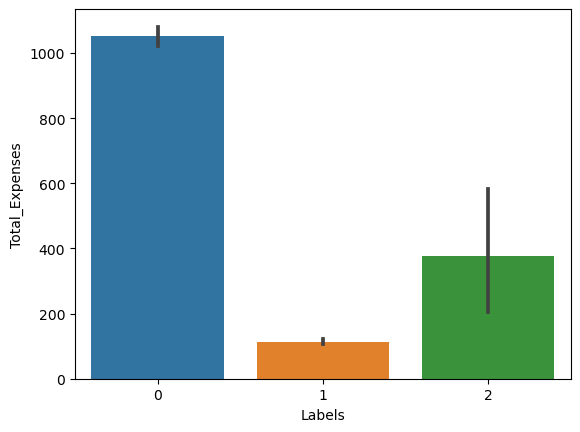

In [38]:
sns.barplot(df_hier['Labels'], df_hier['Total_Expenses'])
plt.show()

<ul>
    <li>Total_Expenses is much higher for cluster 0, compared to cluster 1 and 2.</li>
</ul>

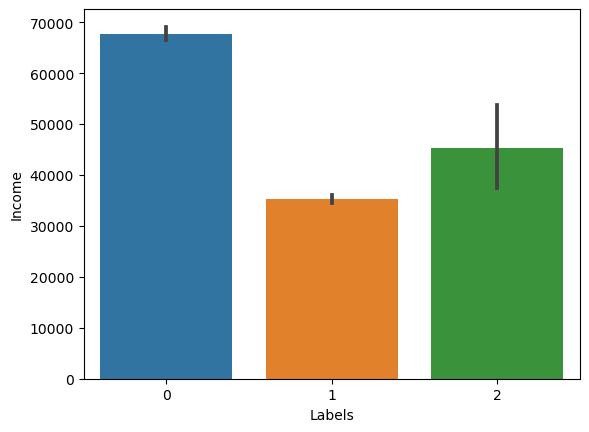

In [39]:
sns.barplot(df_hier['Labels'], df_hier['Income'])
plt.show()

<ul>
    <li>Income is also much higher for cluster 0, followed by cluster 2 and cluster 1 respectively.</li>
</ul>

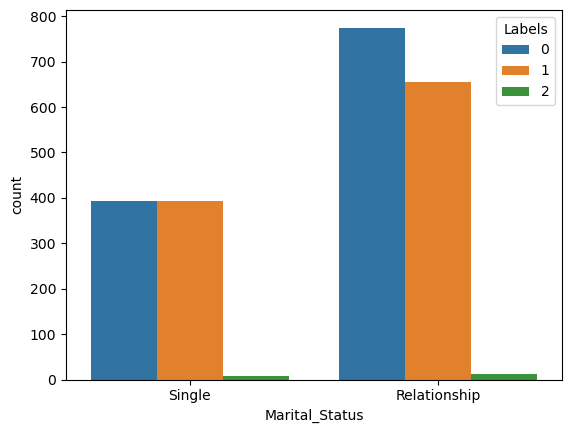

In [40]:
sns.countplot(df_hier['Marital_Status'], hue='Labels', data=df_hier)
plt.show()

<ul>
    <li>We can observe that most of the customers who are in a relationship fall under cluster 0.</li>
    <li>Customers who are single fall almost equally under clusters 0 and 1.</li>
</ul>

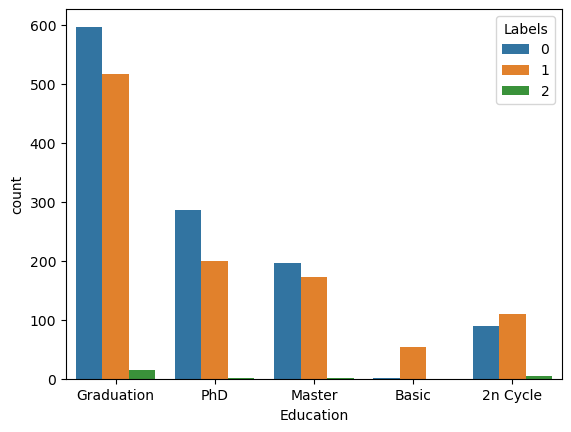

In [41]:
sns.countplot(df_hier['Education'], hue='Labels', data=df_hier)
plt.show()

<ul>
    <li>We can observe that under each education level, there are more customers from cluster 0, followed by cluster 1 and 2 respectively.</li>
    <li>Customers from cluster 2 have the lowest education levels.</li>
</ul>

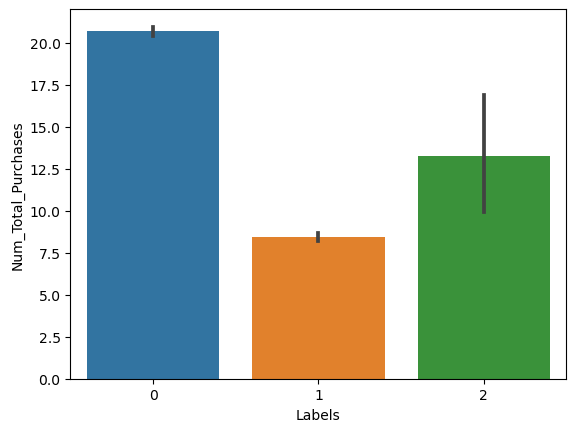

In [42]:
sns.barplot(df_hier['Labels'], df_hier['Num_Total_Purchases'])
plt.show()

<ul>
    <li>We can observe that the total number of purchase is also a lot higher for customers under cluster 0, compared to clusters 1 or 2.</li>
</ul>

<h4>Overall inferences:</h4>

<ul>
    <li>We can conclude that customers belonging to cluster 0 do the maximum number of purchases, maximum spending, and have the highest incomes.</li>
    <li>Customers belonging to cluster 1 have lowest incomes, hence lowest number of purchases and lowest total spendings compared to cluster 0 and cluster 2.</li>
    <li>Despite having lower education, customers belonging to cluster 2 have average overall incomes, average number of purchases and total spendings.</li>
</ul>

-----
## Happy Learning :)
-----